In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Exercise 2
Part 1

In [2]:
def objective_function(x):
    return np.sqrt(x**2 + 5)

def zero_order_oracle_optimization(epsilon, L, search_space):
    grid_resolution = 2 * epsilon / L
    X = np.arange(search_space[0], search_space[1] + grid_resolution, grid_resolution)

    # Evaluate the objective function for all points in X
    f_values = np.array([objective_function(x) for x in X])

    # Find the minimum point xe
    xe_index = np.argmin(f_values)
    xe = X[xe_index]

    return xe, f_values

# Set the parameters
A = 3
L = 1
epsilon_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6] # for all values of epsilon the code is not running
search_space = [-A/10 - 2, A/10 + 2]

# Run the algorithm for each epsilon
results = {}
for epsilon in epsilon_values:
    xe, f_values = zero_order_oracle_optimization(epsilon, L, search_space)
    results[epsilon] = {"xe": xe, "f_values": f_values}

# Print the results
for epsilon, result in results.items():
    print(f"For epsilon = {epsilon}:")
    print(f"xe: {result['xe']}")
    print(f"Objective function values at xe: {result['f_values'][np.argmin(result['f_values'])]}")
    print()

For epsilon = 0.1:
xe: -0.09999999999999787
Objective function values at xe: 2.238302928559939

For epsilon = 0.01:
xe: 2.220446049250313e-15
Objective function values at xe: 2.23606797749979

For epsilon = 0.001:
xe: -2.531308496145357e-13
Objective function values at xe: 2.23606797749979

For epsilon = 0.0001:
xe: -2.531308496145357e-13
Objective function values at xe: 2.23606797749979

For epsilon = 1e-05:
xe: 1.5067946890212625e-11
Objective function values at xe: 2.23606797749979

For epsilon = 1e-06:
xe: -1.8921308964081618e-10
Objective function values at xe: 2.23606797749979



Exercise 2
Part 2

Minimum value: 3.1401849173675502e-15
Corresponding point: (2.220446049250313e-15, 2.220446049250313e-15)


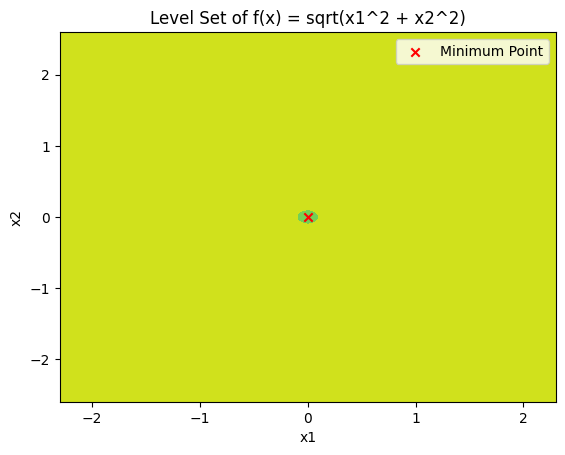

In [3]:
import numpy as np
from itertools import product

# Define the objective function
def f(x):
    return np.sqrt(x[0]**2 + x[1]**2)

# Define the search space parameters based on the given constraints
A = 3  # Replace with the last digit of your roll number
search_space = [(-A/10 - 2, A/10 + 2), (-A/5 - 2, A/5 + 2)]

# Define the grid resolution values for different epsilon values
epsilons = [1e-1, 1e-2, 1e-3]

# Initialize the minimum function value and corresponding point
min_value = float('inf')
min_point = None

# Implement Algorithm 1
for epsilon in epsilons:
    grid_resolution = 2 * epsilon * 1  # L = 1 in this case
    x_grid = np.arange(search_space[0][0], search_space[0][1] + grid_resolution, grid_resolution)
    y_grid = np.arange(search_space[1][0], search_space[1][1] + grid_resolution, grid_resolution)
    grid_points = list(product(x_grid, y_grid))

    # Evaluate the function for all grid points
    for point in grid_points:
        current_value = f(point)
        if current_value < min_value:
            min_value = current_value
            min_point = point

# Output the results
print(f"Minimum value: {min_value}")
print(f"Corresponding point: {min_point}")

# Create a meshgrid for contour plotting
x_vals, y_vals = np.meshgrid(x_grid, y_grid)
z_vals = np.sqrt(x_vals**2 + y_vals**2)

# Plot the level set
plt.contourf(x_vals, y_vals, z_vals, locator=plt.LogLocator(), levels=20, cmap='viridis')
plt.scatter(*min_point, color='red', marker='x', label='Minimum Point')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Set of f(x) = sqrt(x1^2 + x2^2)')
plt.legend()
plt.show()



Exercise 2
Part 3

**Observations:**

**Observation (1):**
For the function \(f(x) = x^2 + 5\) in the one-dimensional search space \(S = \{x : -\frac{A}{10} - 2 \leq x \leq \frac{A}{10} + 2\}\), as \(\epsilon\) decreases, the algorithm explores the search space more finely. This results in a more accurate estimation of the minimum value and its corresponding point. However, smaller \(\epsilon\) values lead to an increase in computational cost.

**Observation (2):**
For the two-variable function \(f(x_1, x_2) = x_1^2 + x_2^2\) in the two-dimensional search space \(S = \{(x_1, x_2) : -\frac{A}{10} - 2 \leq x_1 \leq \frac{A}{10} + 2, -\frac{A}{5} - 2 \leq x_2 \leq \frac{A}{5} + 2\}\), similar observations are made. As \(\epsilon\) decreases, the algorithm explores the search space more finely, resulting in more accurate estimates of the minimum value and its corresponding point. However, smaller \(\epsilon\) values come with increased computational costs.

**General Observation:**
The choice of \(\epsilon\) in zero-order oracle optimization is a trade-off between accuracy and computational efficiency. Smaller \(\epsilon\) values improve accuracy by allowing a finer exploration of the search space but at the expense of increased computational cost. Larger \(\epsilon\) values provide faster computations but may sacrifice precision.

**Cardinality of the Set of Grid Points:**
For a general \(d\)-variable function in a \(d\)-dimensional search space \(S\), the cardinality of the set of all grid points can be expressed as \((2\frac{L}{\epsilon})^d\), where \(L\) is the grid resolution. This expression represents the total number of grid points needed to discretize the search space in each dimension.

**Interpretation:**
As \(d\) increases, the number of grid points grows exponentially, emphasizing the computational challenge associated with high-dimensional optimization. The choice of \(\epsilon\) and \(L\) directly influences the granularity of the grid and, consequently, the computational complexity. A balance must be struck to ensure a reasonable trade-off between accuracy and computational efficiency.


Exercise 2
Part 4

**Shortcomings and Possible Solutions for Zero-Order Oracle Optimization Algorithm:**

### Shortcomings:

1. **Computational Cost:**
   - *Issue:* The algorithm can be computationally expensive, especially with increasing dimensionality and fine grid resolutions.
   - *Reason:* The cardinality of the set of grid points grows exponentially with the dimensionality of the search space.
   - *Solution:* Consider more efficient sampling techniques, such as randomized or adaptive sampling, to reduce the number of evaluations while maintaining accuracy.

2. **Grid Dependency:**
   - *Issue:* The algorithm heavily relies on a grid-based approach, potentially missing the true optimum if it lies between grid points.
   - *Reason:* Discretizing the search space may not thoroughly explore regions with sparse grid points.
   - *Solution:* Implement more sophisticated optimization strategies like evolutionary algorithms or trust-region methods that don't rely on a predefined grid.

3. **Local Minima and Convergence:**
   - *Issue:* The algorithm may get stuck in local minima and struggle to converge to the global minimum.
   - *Reason:* Grid-based approach might not explore the entire search space thoroughly.
   - *Solution:* Implement global optimization techniques or combine with meta-heuristic algorithms to enhance the exploration of the entire search space.

### Possible Solutions:

1. **Adaptive Grid Resolution:**
   - *Idea:* Implement adaptive grid resolution that dynamically adjusts based on the function landscape.
   - *Benefits:* Allows the algorithm to concentrate grid points in regions with more significant variations, potentially reducing the overall number of grid points needed.

2. **Randomized Sampling:**
   - *Idea:* Incorporate randomized sampling to diversify the exploration of the search space.
   - *Benefits:* Randomized sampling can help escape local minima and provide a more global view of the optimization landscape.

3. **Meta-Heuristic Integration:**
   - *Idea:* Integrate meta-heuristic algorithms like genetic algorithms or simulated annealing alongside the zero-order optimization.
   - *Benefits:* Meta-heuristic algorithms can complement the grid-based approach by providing global exploration and escaping local minima.

4. **Probabilistic Models:**
   - *Idea:* Use probabilistic models to predict function values between grid points.
   - *Benefits:* Probabilistic models (e.g., Gaussian processes) provide estimates of function values in unexplored regions, allowing for a more continuous exploration.

5. **Local Refinement:**
   - *Idea:* After identifying a potential minimum, apply local refinement methods like gradient-based optimization.
   - *Benefits:* Local refinement helps improve precision in the vicinity of identified minima without excessively fine grid requirements.

By addressing these shortcomings and incorporating these solutions, the zero-order oracle optimization algorithm can become more robust and efficient, particularly in high-dimensional and complex optimization problems.
